In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.pandas.set_option("display.max_columns", None)

In [2]:
train_file_path = r"D:\Energy Efficiency ML\Energy-Efficiency-ML-Project\energyefficiency\artifact\data_ingestion\2022-07-16_20-51-15\ingested_data\train\ENB2012_data.xlsx"

In [3]:
df1 = pd.read_excel(train_file_path)

In [4]:
df1.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.66,759.5,318.5,220.5,3.5,5,0.25,1,13.18,16.19
1,0.62,808.5,367.5,220.5,3.5,5,0.10,4,13.00,14.47
2,0.82,612.5,318.5,147.0,7.0,5,0.25,2,24.94,29.88
3,0.62,808.5,367.5,220.5,3.5,3,0.25,5,13.99,14.61
4,0.66,759.5,318.5,220.5,3.5,2,0.10,4,11.44,14.86


In [5]:
df1.shape

(614, 10)

In [6]:
df1[["Heating_Load","Cooling_Load"]]

,Heating_Load,Cooling_Load
0,13.18,16.19
1,13.00,14.47
2,24.94,29.88
3,13.99,14.61
4,11.44,14.86
...,...,...
609,11.22,14.44
610,16.90,16.79
611,24.58,26.47
612,12.19,14.71


In [7]:
X,y = df1.drop(columns=["Heating_Load","Cooling_Load"]),df1[["Heating_Load","Cooling_Load"]]

In [8]:
X

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution
0,0.66,759.5,318.5,220.50,3.5,5,0.25,1
1,0.62,808.5,367.5,220.50,3.5,5,0.10,4
2,0.82,612.5,318.5,147.00,7.0,5,0.25,2
3,0.62,808.5,367.5,220.50,3.5,3,0.25,5
4,0.66,759.5,318.5,220.50,3.5,2,0.10,4
...,...,...,...,...,...,...,...,...
609,0.69,735.0,294.0,220.50,3.5,2,0.10,3
610,0.62,808.5,367.5,220.50,3.5,3,0.40,4
611,0.98,514.5,294.0,110.25,7.0,2,0.10,1
612,0.71,710.5,269.5,220.50,3.5,3,0.25,5


In [9]:
y

,Heating_Load,Cooling_Load
0,13.18,16.19
1,13.00,14.47
2,24.94,29.88
3,13.99,14.61
4,11.44,14.86
...,...,...
609,11.22,14.44
610,16.90,16.79
611,24.58,26.47
612,12.19,14.71


In [10]:
X.shape

(614, 8)

In [11]:
y.shape

(614, 2)

##### Check for null or Nan values 

In [12]:
X.isnull().sum()

Relative_Compactness         0
Surface_Area                 0
Wall_Area                    0
Roof_Area                    0
Overall_Height               0
Orientation                  0
Glazing_Area                 0
Glazing_Area_Distribution    0
dtype: int64

In [13]:
y.isnull().sum()

Heating_Load    0
Cooling_Load    0
dtype: int64

In [14]:
for i in X.columns:
    X_unique_values = [i,list(X[i].unique())]
    print(X_unique_values)

['Relative_Compactness', [0.66, 0.62, 0.82, 0.74, 0.71, 0.79, 0.76, 0.98, 0.69, 0.9, 0.86, 0.64]]
['Surface_Area', [759.5, 808.5, 612.5, 686.0, 710.5, 637.0, 661.5, 514.5, 735.0, 563.5, 588.0, 784.0]]
['Wall_Area', [318.5, 367.5, 245.0, 269.5, 343.0, 416.5, 294.0]]
['Roof_Area', [220.5, 147.0, 122.5, 110.25]]
['Overall_Height', [3.5, 7.0]]
['Orientation', [5, 3, 2, 4]]
['Glazing_Area', [0.25, 0.1, 0.4, 0.0]]
['Glazing_Area_Distribution', [1, 4, 2, 5, 3, 0]]


In [15]:
for i in y.columns:
    y_unique_values = [i,list(y[i].unique())]
    print(y_unique_values)

['Heating_Load', [13.18, 13.0, 24.94, 13.99, 11.44, 14.54, 10.14, 12.36, 12.63, 14.22, 16.77, 39.97, 39.83, 11.33, 32.31, 14.52, 35.94, 32.75, 13.01, 11.22, 32.29, 34.24, 29.71, 36.45, 12.77, 23.8, 39.01, 16.55, 28.67, 6.01, 31.29, 10.8, 29.08, 34.72, 26.33, 19.13, 24.63, 14.5, 15.29, 14.1, 14.9, 35.65, 12.12, 8.45, 19.12, 13.94, 31.84, 15.34, 32.21, 12.95, 17.14, 28.61, 28.83, 12.16, 12.86, 33.27, 14.6, 13.17, 32.82, 41.3, 10.55, 12.74, 14.7, 25.17, 36.59, 28.57, 6.07, 32.73, 38.84, 12.73, 35.56, 29.4, 24.31, 36.91, 14.34, 17.11, 12.65, 38.57, 16.93, 36.28, 32.74, 28.01, 12.35, 40.15, 11.16, 11.34, 16.62, 10.34, 11.98, 32.72, 32.67, 29.87, 10.71, 36.06, 10.78, 10.46, 39.31, 35.64, 12.88, 16.83, 12.32, 11.43, 28.15, 39.81, 12.72, 12.27, 17.26, 23.54, 11.42, 17.88, 24.6, 18.48, 10.7, 12.93, 12.8, 14.41, 28.07, 15.23, 40.0, 12.29, 16.74, 12.43, 31.53, 10.72, 14.96, 11.45, 33.08, 36.57, 19.5, 29.53, 12.45, 40.78, 18.31, 15.09, 12.92, 7.1, 29.14, 17.5, 15.16, 14.92, 14.47, 36.26, 42.49, 24

<AxesSubplot:>

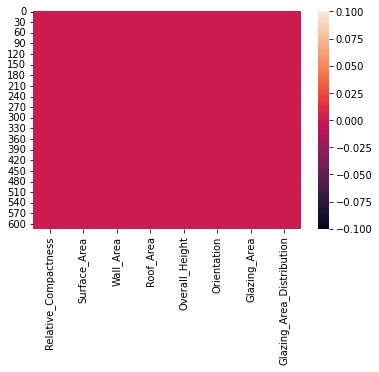

In [16]:
sns.heatmap(X.isnull())

<AxesSubplot:>

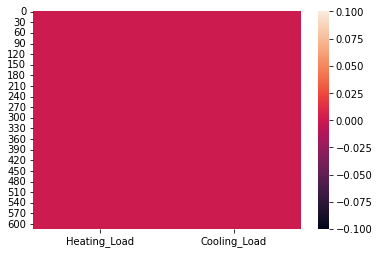

In [17]:
sns.heatmap(y.isnull())

##### Observation: There are no Null or NaN Values in both X, y

#### Checking for Outliers

In [18]:
X.columns

Index(['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area',
       'Overall_Height', 'Orientation', 'Glazing_Area',
       'Glazing_Area_Distribution'],
      dtype='object')

In [19]:
X.describe()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.764007,671.714984,317.023616,177.345684,5.215798,3.482085,0.231270,2.793160
std,0.105019,87.255621,44.461008,45.258007,1.751092,1.124619,0.132393,1.556301
min,0.620000,514.500000,245.000000,110.250000,3.500000,2.000000,0.000000,0.000000
25%,0.690000,612.500000,294.000000,147.000000,3.500000,2.000000,0.100000,1.000000
50%,0.740000,686.000000,318.500000,220.500000,3.500000,3.000000,0.250000,3.000000
75%,0.820000,735.000000,343.000000,220.500000,7.000000,4.000000,0.400000,4.000000
max,0.980000,808.500000,416.500000,220.500000,7.000000,5.000000,0.400000,5.000000


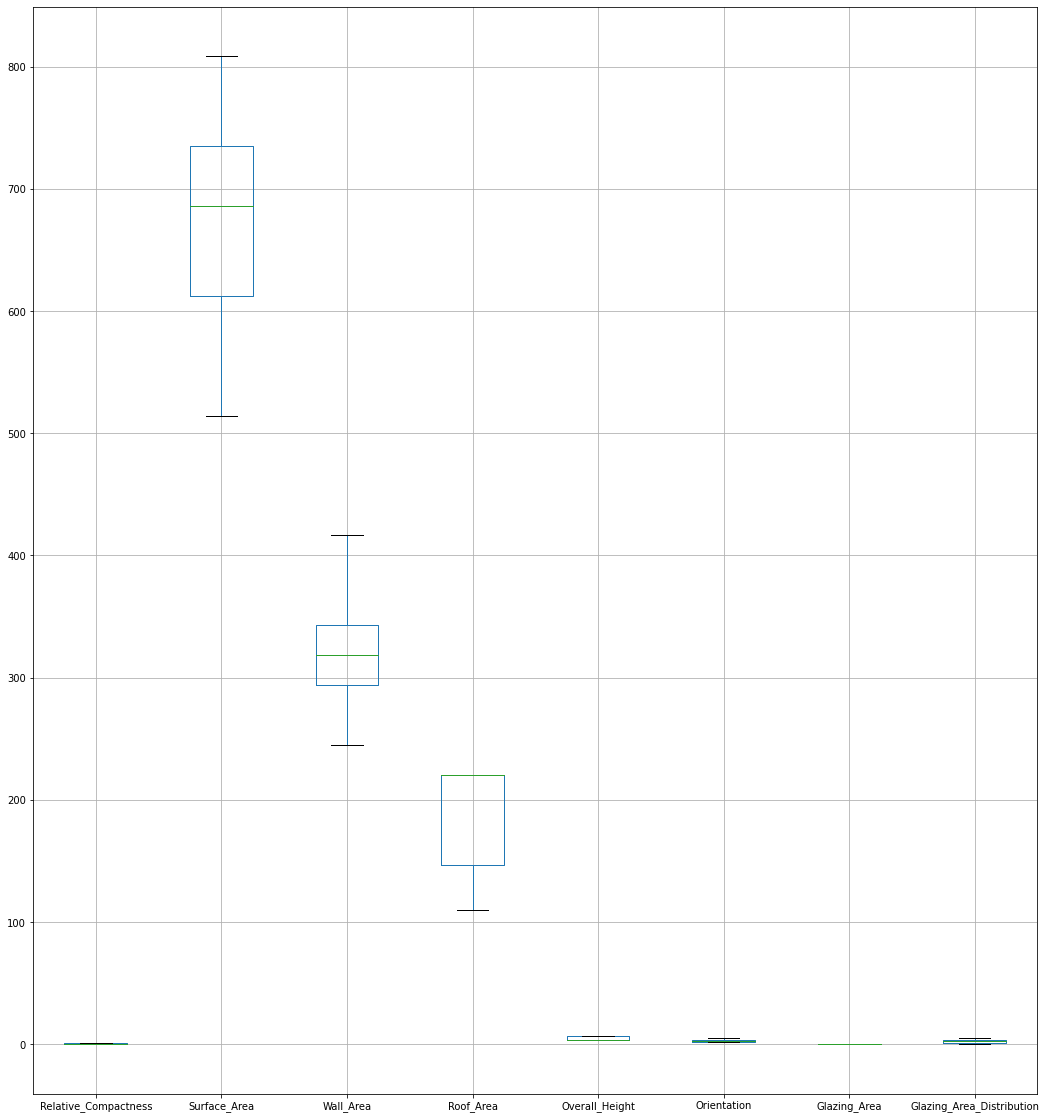

In [20]:
plt.figure(figsize=(18,20))
X.boxplot()
plt.show()

d:\Energy Efficiency ML\Energy-Efficiency-ML-Project\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Relative_Compactness'>

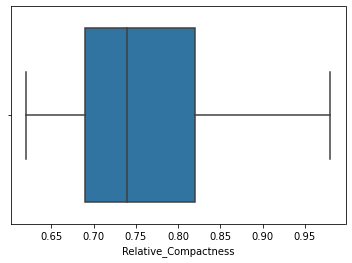

In [21]:
sns.boxplot(X['Relative_Compactness'])

d:\Energy Efficiency ML\Energy-Efficiency-ML-Project\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Surface_Area'>

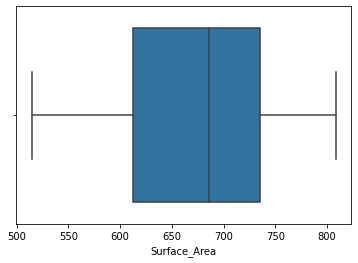

In [22]:
sns.boxplot(X['Surface_Area'])

d:\Energy Efficiency ML\Energy-Efficiency-ML-Project\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Wall_Area'>

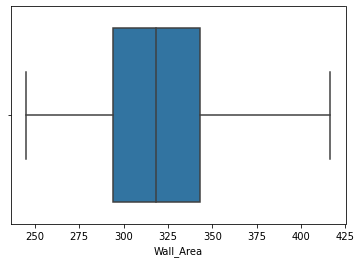

In [23]:
sns.boxplot(X['Wall_Area'])

d:\Energy Efficiency ML\Energy-Efficiency-ML-Project\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Roof_Area'>

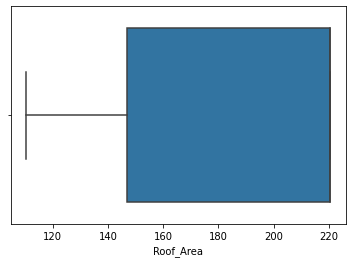

In [24]:
sns.boxplot(X['Roof_Area'])

d:\Energy Efficiency ML\Energy-Efficiency-ML-Project\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Overall_Height'>

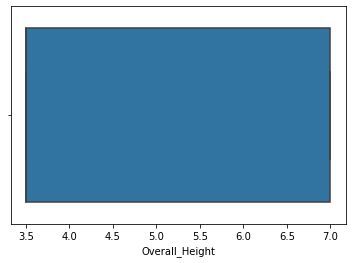

In [25]:
sns.boxplot(X['Overall_Height'])

d:\Energy Efficiency ML\Energy-Efficiency-ML-Project\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Orientation'>

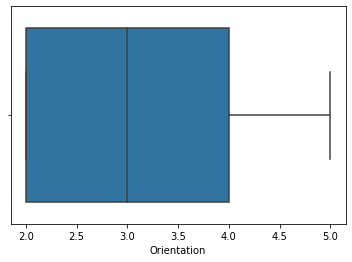

In [26]:
sns.boxplot(X['Orientation'])

d:\Energy Efficiency ML\Energy-Efficiency-ML-Project\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Glazing_Area'>

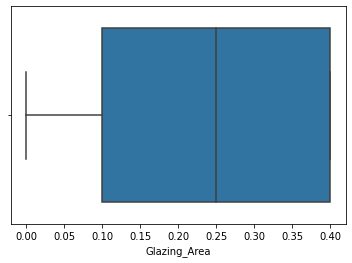

In [27]:
sns.boxplot(X['Glazing_Area'])

d:\Energy Efficiency ML\Energy-Efficiency-ML-Project\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Glazing_Area_Distribution'>

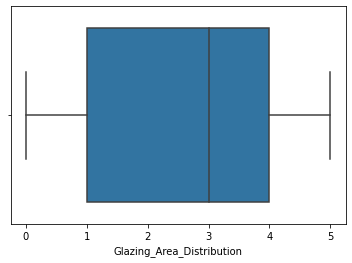

In [28]:
sns.boxplot(X['Glazing_Area_Distribution'])

In [29]:
y.columns

Index(['Heating_Load', 'Cooling_Load'], dtype='object')

d:\Energy Efficiency ML\Energy-Efficiency-ML-Project\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Heating_Load'>

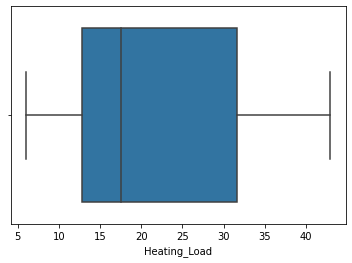

In [30]:
sns.boxplot(y['Heating_Load'])

d:\Energy Efficiency ML\Energy-Efficiency-ML-Project\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Cooling_Load'>

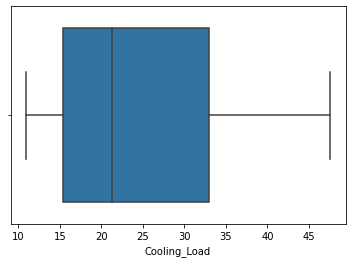

In [31]:
sns.boxplot(y['Cooling_Load'])

##### Observation: From the above Box Plots we can derive the conclusion that there are no outliers in our train dataset X, y

##### Checking the relationship of independent features with output Heating and Cooling load, also the correlation between the independent features

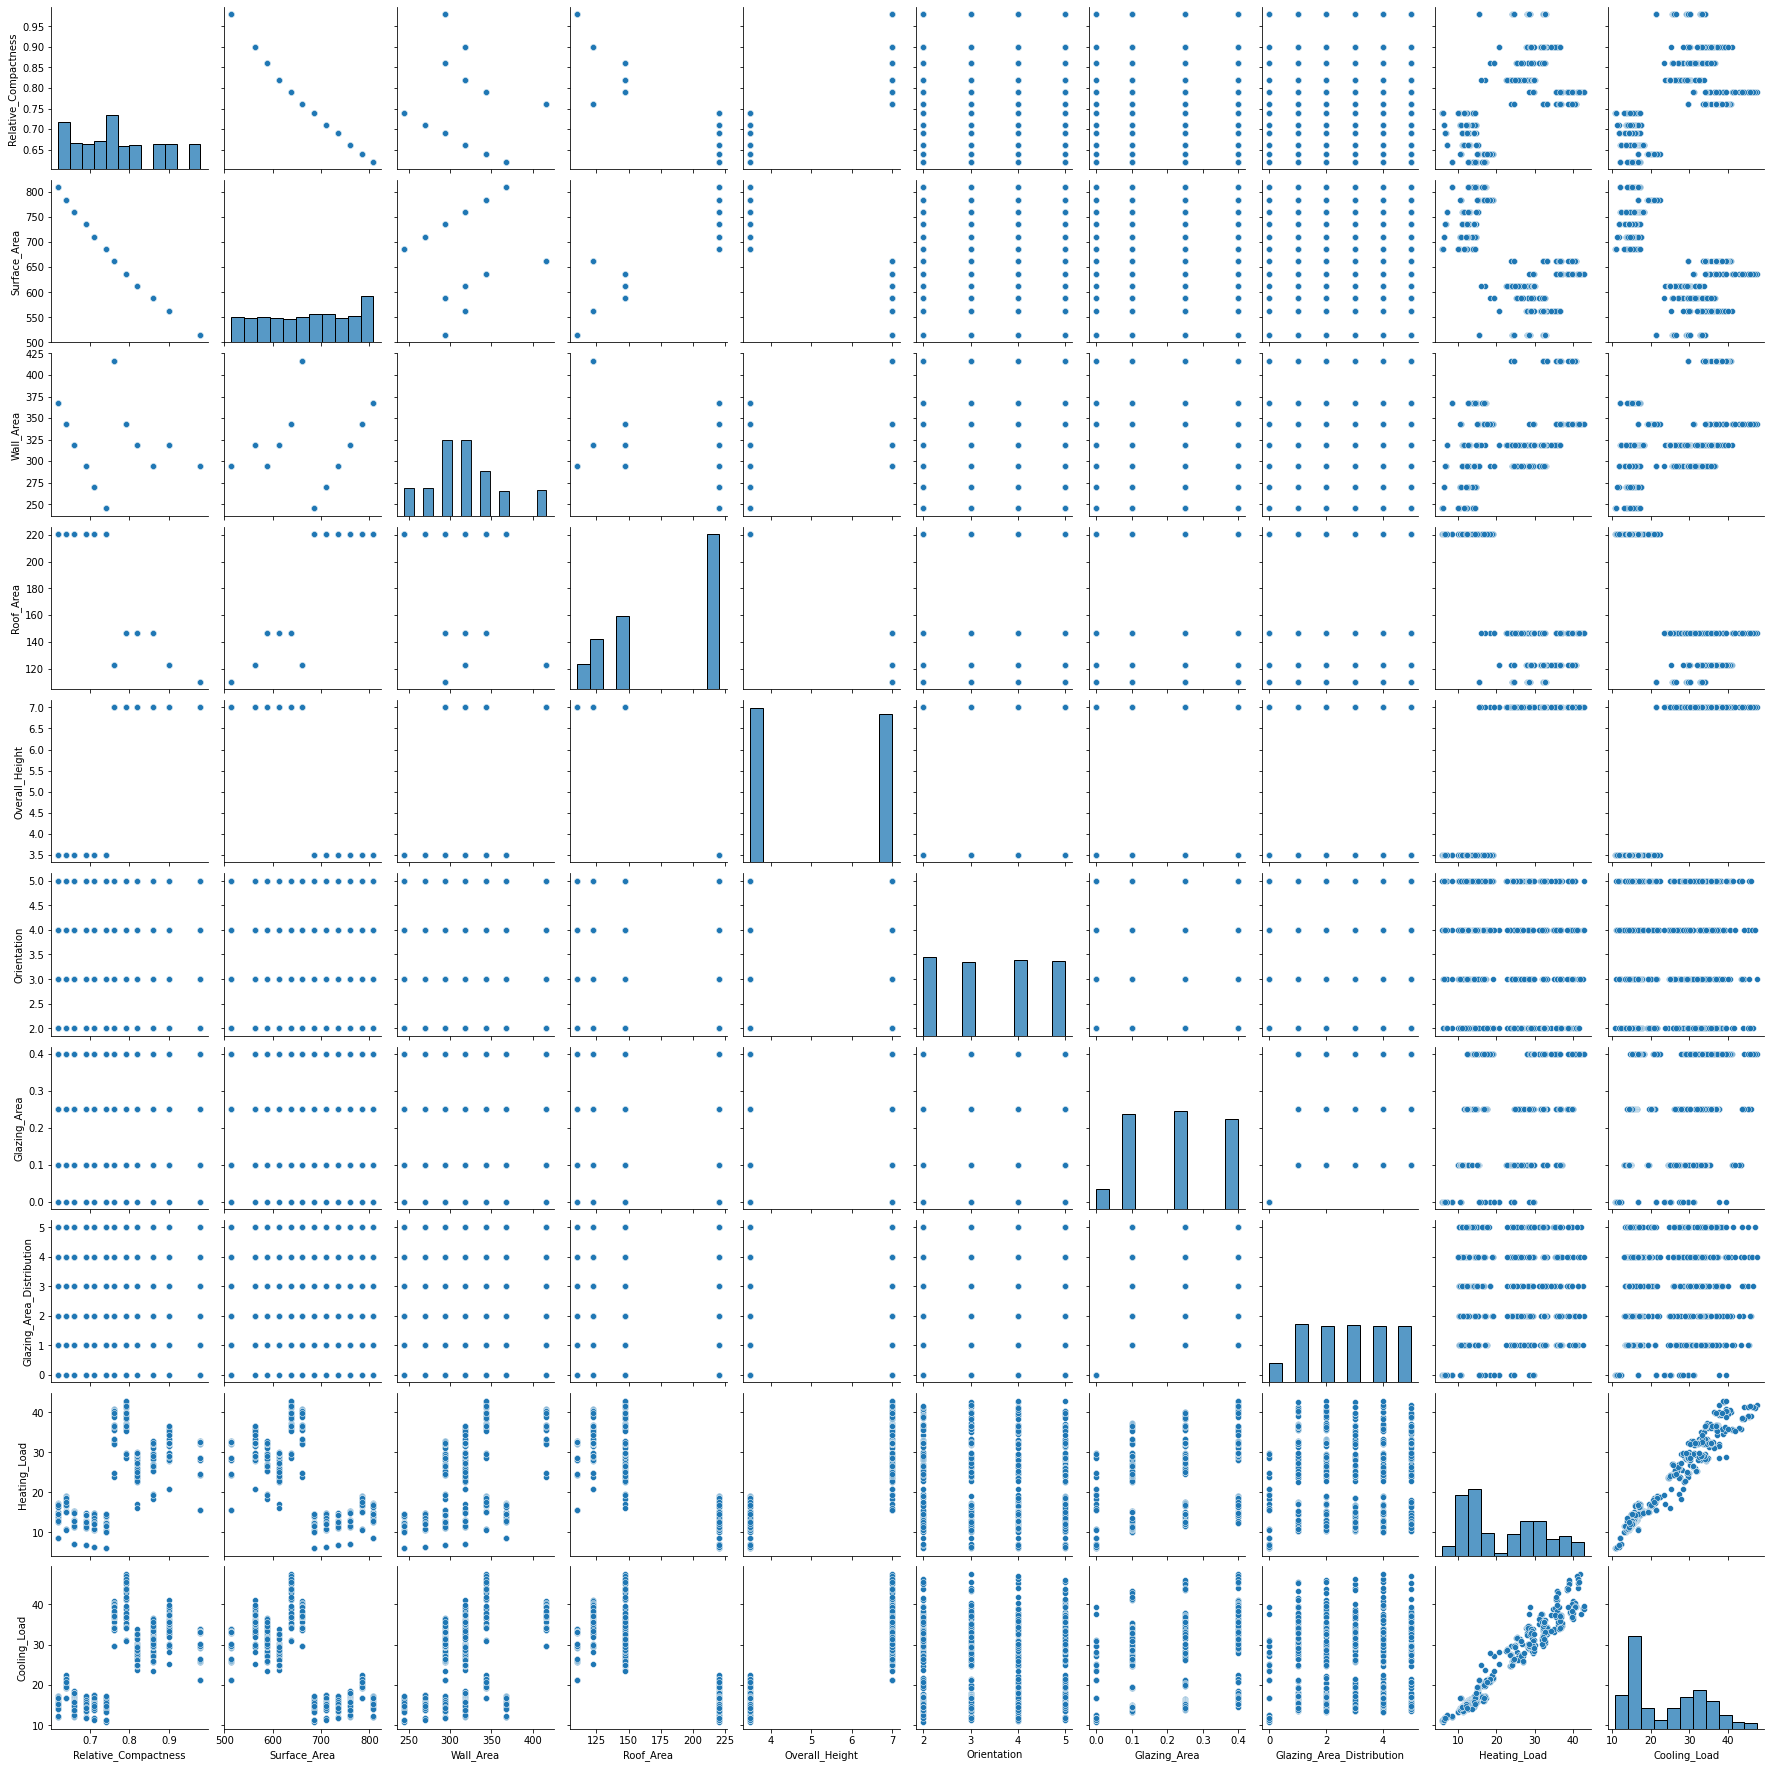

In [32]:
sns.pairplot(df1)

<AxesSubplot:>

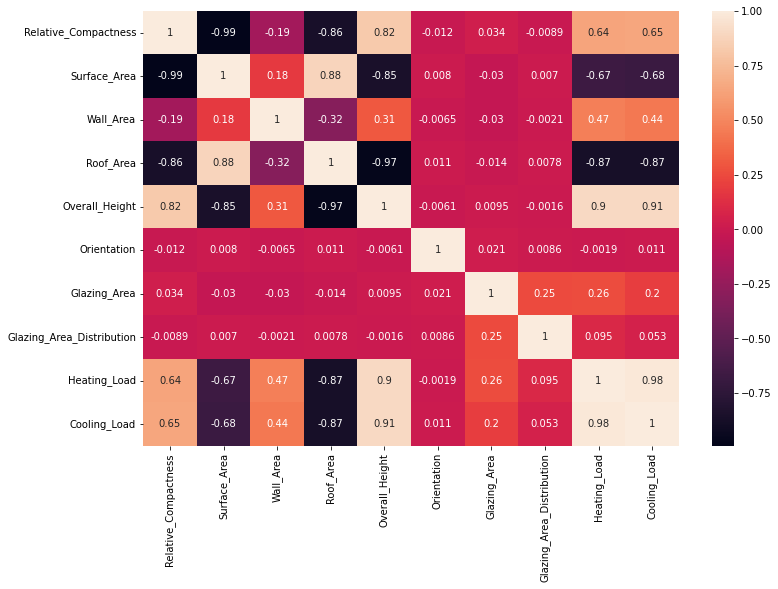

In [33]:
plt.figure(figsize=(12,8))
sns.heatmap(data=df1.corr(),annot=True)

Observation:
1. From the above heatmap it is evident that Relative Compactness and Surface Area have negative correlation of 0.99
2. The Output Features Heating and Cooling Load is also having a correlation of 0.98
3. No other features have correlation more than 0.95
4. Hence, as the dataset is very small we will not drop any of the columns (Relative Compactness and Surface Area)

##### In case of any Null or Nan Values that comes in a new dataset we need to care of them so using simple imputer in such cases to overcome the issue of missing values

In [34]:
from sklearn.impute import SimpleImputer

In [35]:
### For numerical Values

simple_imputer_num = SimpleImputer(strategy="median") # In case we have outliers


In [36]:
simple_imputer_num_2 = SimpleImputer(strategy="mean")

In [37]:
### For categorical features

simple_imputer_cat = SimpleImputer(strategy="most_frequent")

##### Respective fit_transform needs to be carried out for the numerical and categorical features to get rid of missing values

##### Custom Transformer

In [38]:
class FeatureGenerator():

    def __init__(self,strategy="median"):
        self.strategy = strategy

    def fit(self,A):
        self.features = A.columns
        self.statistic_ = []
        for column in A.columns:
            self.statistic_.append(A[column].median())
        return self

    def transform(self,A:pd.DataFrame):
        for idx,column in enumerate(A.columns):
            A[column].fillna(self.statistic_[idx])
        return X 

    def fit_transform(self,A):
        self.fit(A)
        return self.transform(A)

In [39]:
from sklearn.base import BaseEstimator, TransformerMixin

In [40]:
class FeatureGenerator(BaseEstimator,TransformerMixin):

    def __init__(self,strategy="median"):
        self.strategy = strategy

    def fit(self,A):
        self.features = A.columns
        self.statistic_ = []
        for column in A.columns:
            self.statistic_.append(A[column].median())
        return self

    def transform(self,A:pd.DataFrame):
        for idx,column in enumerate(A.columns):
            A[column].fillna(self.statistic_[idx])
        return A 

        ## With TransformerMixin inherited we need not write fit_transform as it is taken care by the TransformerMixin

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [42]:
num_pipeline = Pipeline(steps=[
                ('imputer', SimpleImputer(strategy="median")),
                ('scaler', StandardScaler())
            ])

In [43]:
from sklearn.compose import ColumnTransformer

In [44]:
from energyefficiency.constant import *
from energyefficiency.util.util import read_yaml_file

In [45]:
schema_file_path = r'D:\Energy Efficiency ML\Energy-Efficiency-ML-Project\config\schema.yaml'
dataset_schema = read_yaml_file(schema_file_path)
numerical_columns = dataset_schema[NUMERICAL_COLUMN_KEY]

In [46]:
preprocessing = ColumnTransformer([
    ('imputer', SimpleImputer(strategy="median"),numerical_columns),
    ('scaler', StandardScaler(),numerical_columns)])

In [47]:
preprocessing

ColumnTransformer(transformers=[('imputer', SimpleImputer(strategy='median'),
                                 ['Relative_Compactness', 'Surface_Area',
                                  'Wall_Area', 'Roof_Area', 'Overall_Height',
                                  'Orientation', 'Glazing_Area',
                                  'Glazing_Area_Distribution']),
                                ('scaler', StandardScaler(),
                                 ['Relative_Compactness', 'Surface_Area',
                                  'Wall_Area', 'Roof_Area', 'Overall_Height',
                                  'Orientation', 'Glazing_Area',
                                  'Glazing_Area_Distribution'])])

In [48]:
numerical_columns

['Relative_Compactness',
 'Surface_Area',
 'Wall_Area',
 'Roof_Area',
 'Overall_Height',
 'Orientation',
 'Glazing_Area',
 'Glazing_Area_Distribution']

In [49]:
target_columns = dataset_schema[TARGET_COLUMN_KEY]

In [50]:
target_columns

['Heating_Load', 'Cooling_Load']

In [51]:
train_arr1 = preprocessing.fit_transform(X)

In [52]:
train_arr1

array([[ 6.60000000e-01,  7.59500000e+02,  3.18500000e+02, ...,
         1.35081543e+00,  1.41585358e-01, -1.15313248e+00],
       [ 6.20000000e-01,  8.08500000e+02,  3.67500000e+02, ...,
         1.35081543e+00, -9.92328686e-01,  7.76086439e-01],
       [ 8.20000000e-01,  6.12500000e+02,  3.18500000e+02, ...,
         1.35081543e+00,  1.41585358e-01, -5.10059508e-01],
       ...,
       [ 9.80000000e-01,  5.14500000e+02,  2.94000000e+02, ...,
        -1.31892923e+00, -9.92328686e-01, -1.15313248e+00],
       [ 7.10000000e-01,  7.10500000e+02,  2.69500000e+02, ...,
        -4.29014343e-01,  1.41585358e-01,  1.41915941e+00],
       [ 6.90000000e-01,  7.35000000e+02,  2.94000000e+02, ...,
        -4.29014343e-01,  1.41585358e-01,  1.33013465e-01]])

In [53]:
test_file_path = r"D:\Energy Efficiency ML\Energy-Efficiency-ML-Project\energyefficiency\artifact\data_ingestion\2022-07-16_20-51-15\ingested_data\test\ENB2012_data.xlsx"

In [54]:
test_df1 = pd.read_excel(test_file_path)

In [55]:
test_df1

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.62,808.5,367.5,220.50,3.5,3,0.25,4,14.61,15.56
1,0.76,661.5,416.5,122.50,7.0,2,0.25,3,35.99,36.07
2,0.98,514.5,294.0,110.25,7.0,4,0.10,4,24.04,26.18
3,0.71,710.5,269.5,220.50,3.5,4,0.40,2,14.40,17.27
4,0.64,784.0,343.0,220.50,3.5,4,0.40,1,19.48,22.72
...,...,...,...,...,...,...,...,...,...,...
149,0.86,588.0,294.0,147.00,7.0,4,0.10,5,25.36,32.04
150,0.69,735.0,294.0,220.50,3.5,2,0.10,4,11.18,14.29
151,0.62,808.5,367.5,220.50,3.5,5,0.10,3,12.73,13.89
152,0.79,637.0,343.0,147.00,7.0,4,0.40,1,42.50,38.35


In [56]:
preprocessing.transform(test_df1)

array([[ 6.20000000e-01,  8.08500000e+02,  3.67500000e+02, ...,
        -4.29014343e-01,  1.41585358e-01,  7.76086439e-01],
       [ 7.60000000e-01,  6.61500000e+02,  4.16500000e+02, ...,
        -1.31892923e+00,  1.41585358e-01,  1.33013465e-01],
       [ 9.80000000e-01,  5.14500000e+02,  2.94000000e+02, ...,
         4.60900545e-01, -9.92328686e-01,  7.76086439e-01],
       ...,
       [ 6.20000000e-01,  8.08500000e+02,  3.67500000e+02, ...,
         1.35081543e+00, -9.92328686e-01,  1.33013465e-01],
       [ 7.90000000e-01,  6.37000000e+02,  3.43000000e+02, ...,
         4.60900545e-01,  1.27549940e+00, -1.15313248e+00],
       [ 9.80000000e-01,  5.14500000e+02,  2.94000000e+02, ...,
         4.60900545e-01, -9.92328686e-01,  1.33013465e-01]])

Serialization and De-Serialization (Pickling)

In [57]:
import dill

In [58]:
with open('preprocessing.pkl',"wb") as prep_file:
    dill.dump(preprocessing,prep_file)

In [59]:
with open('preprocessing.pkl',"rb") as file_obj:
    preprocessing_load_object = dill.load(file_obj)

In [60]:
preprocessing_load_object.transform(test_df1)

array([[ 6.20000000e-01,  8.08500000e+02,  3.67500000e+02, ...,
        -4.29014343e-01,  1.41585358e-01,  7.76086439e-01],
       [ 7.60000000e-01,  6.61500000e+02,  4.16500000e+02, ...,
        -1.31892923e+00,  1.41585358e-01,  1.33013465e-01],
       [ 9.80000000e-01,  5.14500000e+02,  2.94000000e+02, ...,
         4.60900545e-01, -9.92328686e-01,  7.76086439e-01],
       ...,
       [ 6.20000000e-01,  8.08500000e+02,  3.67500000e+02, ...,
         1.35081543e+00, -9.92328686e-01,  1.33013465e-01],
       [ 7.90000000e-01,  6.37000000e+02,  3.43000000e+02, ...,
         4.60900545e-01,  1.27549940e+00, -1.15313248e+00],
       [ 9.80000000e-01,  5.14500000e+02,  2.94000000e+02, ...,
         4.60900545e-01, -9.92328686e-01,  1.33013465e-01]])

#### Training & Testing

In [61]:
from sklearn.linear_model import LinearRegression

In [62]:
lr_model = LinearRegression()

In [65]:
train_df = pd.read_excel(r'D:\Energy Efficiency ML\Energy-Efficiency-ML-Project\energyefficiency\artifact\data_ingestion\2022-07-16_20-51-15\ingested_data\train\ENB2012_data.xlsx')

In [66]:
X_train,y_train = train_df.drop(columns=['Heating_Load','Cooling_Load']), train_df[['Heating_Load','Cooling_Load']]

In [67]:
X_test,y_test = test_df1.drop(columns=['Heating_Load','Cooling_Load']), test_df1[['Heating_Load','Cooling_Load']]

In [68]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [69]:
lr_model.fit_intercept

True

In [70]:
lr_model.coef_

array([[-6.44370816e+01,  1.04680617e+12, -1.04680617e+12,
        -2.09361235e+12,  4.04408360e+00, -1.60619318e-02,
         1.92481639e+01,  2.07491279e-01],
       [-7.01526778e+01,  5.79982719e+11, -5.79982719e+11,
        -1.15996544e+12,  4.33175755e+00,  9.58925337e-02,
         1.40979878e+01,  2.86164284e-02]])

In [71]:
lr_model.intercept_

array([84.22608469, 95.90099756])

In [72]:
y_hat = lr_model.predict(X_test)

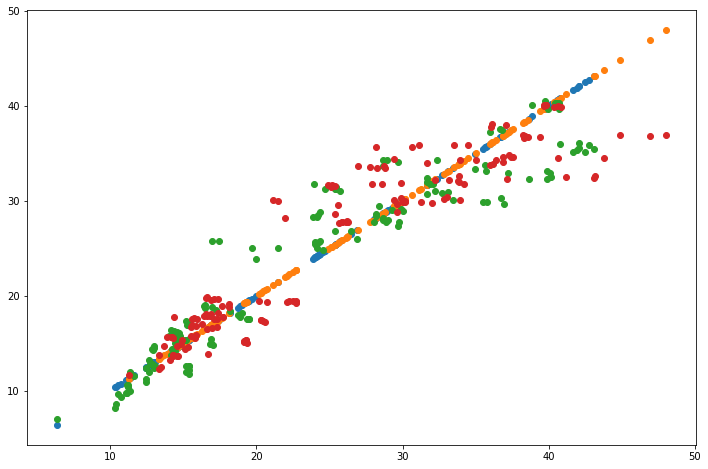

In [73]:
#With Linear Regression
plt.figure(figsize=(12,8))
plt.plot(y_test,y_test,"o")
plt.plot(y_test,y_hat,"o")

In [74]:
from sklearn.metrics import r2_score

In [75]:
r2_score(y_test,y_hat) # r2_score on testing dataset

0.8766312802323584

In [76]:
y_train_hat = lr_model.predict(X_train)

In [77]:
r2_score(y_train,y_train_hat) # r2_score on training dataset

0.9084381198569986

In [78]:
from sklearn.ensemble import RandomForestRegressor

In [79]:
rf_model = RandomForestRegressor()

In [80]:
rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [81]:
y_hat_test_rf = rf_model.predict(X_test)

In [82]:
r2_score(y_test,y_hat_test_rf)

0.9744227723383105

In [83]:
y_hat_train_rf = rf_model.predict(X_train)

In [84]:
r2_score(y_train,y_hat_train_rf)

0.9971855636951186

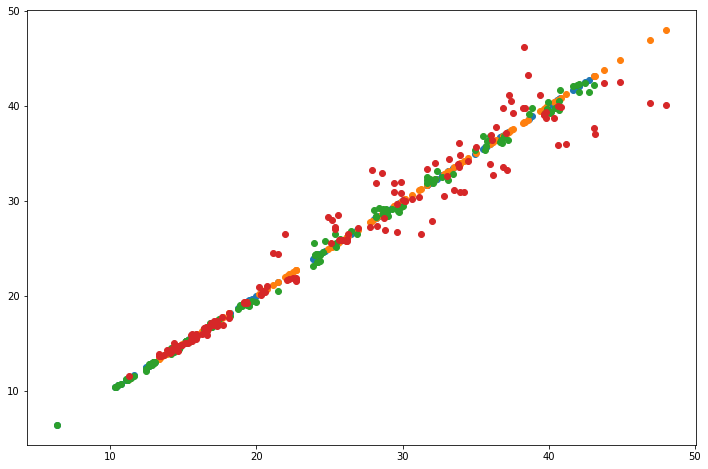

In [85]:
# With RandomForest
plt.figure(figsize=(12,8))
plt.plot(y_test,y_test,"o")
plt.plot(y_test,y_hat_test_rf,"o")